# 기술통계 연습문제(1)

패키지 설치

In [120]:
import sys
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel
from pandas import merge, concat, pivot_table, crosstab, melt

## 문제1

수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시

데이터 준비

In [121]:
df = read_excel("https://data.hossam.kr/D02/kings_life.xlsx")
df

,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


데이터 전처리

In [122]:
df.rename(columns={"수명":"ages"}, inplace=True)
df

,왕,ages
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


그래프 전역 설정

In [123]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

ages 컬럼만 시각화

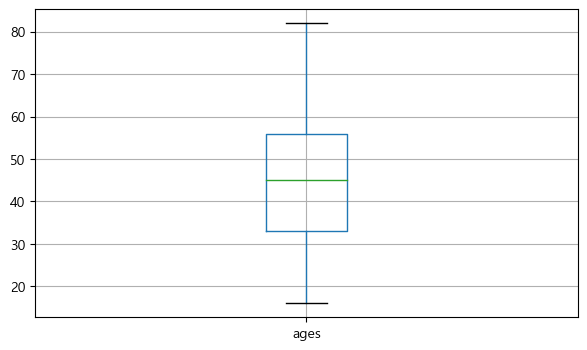

In [124]:
plt.figure()
plt.grid()
df.boxplot(['ages'])
plt.show()
plt.close()

`최대값~최소값`의 구간

In [125]:
max_ages = df['ages'].max()
min_ages = df['ages'].min()

"조선새대 왕의 수명은 {min}세~{max}세 사이 입니다.".format(max=max_ages, min=min_ages)

'조선새대 왕의 수명은 16세~82세 사이 입니다.'

`평균`

In [126]:
mean_ages=df['ages'].mean()
count_왕=df['왕'].count()

"%d명의 조선시대 왕의 수명의 평균값은 %d세입니다"%(count_왕, mean_ages)

'27명의 조선시대 왕의 수명의 평균값은 46세입니다'

`중앙값`

In [127]:
median_ages=df['ages'].median()
count_왕=df['왕'].count()
"%d명의 조선시대 왕의 수명의 중앙값은 %d세입니다"%(count_왕, median_ages)

'27명의 조선시대 왕의 수명의 중앙값은 45세입니다'

3사분위수

In [128]:
ages=list(df['ages'])
총도수=len(ages)
Q3=((총도수+1)*0.75)+1
# print(Q3)
# print(type(Q3))
f"조선시대 왕의 상위 25%내의 수명은 {Q3}세입니다"

'조선시대 왕의 상위 25%내의 수명은 22.0세입니다'

이상치

In [129]:
q1 = df['ages'].quantile(q=0.25)
q3 = df['ages'].quantile(q=0.75)
iqr = q3 - q1
상한 = q3 + iqr * 1.5
print(상한)

90.5


결론 : 27명의 조선 왕들의 평균 수명은 46세이며 중앙값은 45세이다. 이 수치로만 보았을 때 서민들의 평균수명이 30세 안팎인 것을 감안했을 때 준수하다고 할 수 있다. 하지만, 이상치로 확인된 값이 90, 3사분위수(상위25%)의 수명은 22.0세로 특정 인물들의 수명이 높아 이상적인 결론이라고 말하기는 힘들것으로 보인다.

## 문제2

상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가이다.

외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석

최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시

데이터 가져오기

In [130]:
df = read_excel("https://data.hossam.kr/D02/stock.xlsx")
df

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [131]:
# # 상장 회사의 수
# df4 = df.groupby("구분").count()
# df4

In [132]:
# 상장 주식의 평균 가치
df2 = df.groupby("구분").mean()
df2

,주가
구분,
F,155.166667
K,150.833333


In [133]:
# 상장 주식의 중앙값
df3 = df.groupby("구분").median()
df3

,주가
구분,
F,150.0
K,154.0


In [134]:
# 상장 주식의 가치 합
df4 = df.groupby("구분").sum()
df4

,주가
구분,
F,1862
K,1810


In [135]:
# 상장 주식의 가치의 표준편차
df5 = df.groupby("구분").std()
df5

,주가
구분,
F,27.764704
K,21.425700


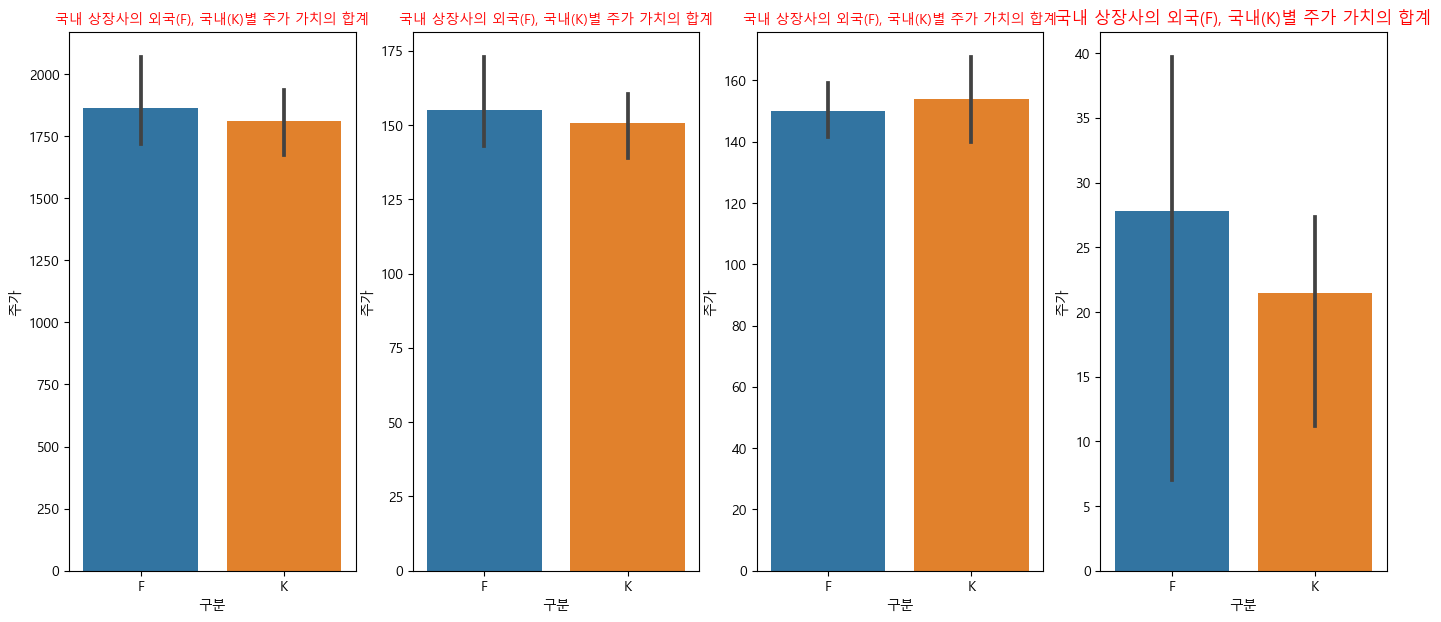

In [136]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(17,7))
# fig.subplots_adjust(wspace=0.2, hspace=0.2)
#-----<ax1>-----#
sb.barplot(data=df, x='구분', y='주가', estimator='sum', ax=ax1)
ax1.title.set_text("국내 상장사의 외국(F), 국내(K)별 주가 가치의 합계")
ax1.title.set_fontsize(10)
ax1.title.set_color("#ff0000")
#-----<ax2>-----#
sb.barplot(data=df, x='구분', y='주가', estimator='mean', ax=ax2)
ax2.title.set_text("국내 상장사의 외국(F), 국내(K)별 주가 가치의 합계")
ax2.title.set_fontsize(10)
ax2.title.set_color("#ff0000")
#-----<ax3>-----#
sb.barplot(data=df, x='구분', y='주가', estimator='median', ax=ax3)
ax3.title.set_text("국내 상장사의 외국(F), 국내(K)별 주가 가치의 합계")
ax3.title.set_fontsize(10)
ax3.title.set_color("#ff0000")
#-----<ax4>-----#
sb.barplot(data=df, x='구분', y='주가', estimator='std', ax=ax4)
ax4.title.set_text("국내 상장사의 외국(F), 국내(K)별 주가 가치의 합계")
ax4.title.set_fontsize(12)
ax4.title.set_color("#ff0000")
#-----<그래프 show및 close 실행>-----#
plt.show()
plt.close()

In [137]:
가치합=df["주가"].sum()

"국내 상장 기업의 전체 가치는 %d입니다"%가치합

'국내 상장 기업의 전체 가치는 3672입니다'

In [138]:
가치평균=df["주가"].mean()

"국내 상장 기업의 전체 가치의 평균은 %d입니다"%가치평균

'국내 상장 기업의 전체 가치의 평균은 153입니다'

In [139]:
중앙값=df["주가"].median()

"국내 상장 기업의 전체 가치의 중앙값은 %d입니다"%중앙값

'국내 상장 기업의 전체 가치의 중앙값은 150입니다'

In [140]:
표준편차=df["주가"].std()

"국내 상장 기업의 전체 가치의 표준편차는 %d입니다"%표준편차

'국내 상장 기업의 전체 가치의 표준편차는 24입니다'

결론 : 국내 상장 기업의 전체 가치의 평균은 153일 때 외국기업 가치의 평균은 155.166667, 국내기업 가치의 평균은 150.833333임을 감안했을 때 외국 기업의 가치가 더 높다고 생각할 수 있습니다.

하지만 전체 가치의 중앙값은 150일 때 외국기업 가치의 중앙값은 150.0, 국내 기업의 가치의 중앙값은 154.0이고 표준편차도 비교적 고르기 때문에 국내 기업의 주식 가치가 외국 기업의 주식에 비해 고르게 분포해있어 투자를 할 경우 국내 기업은 분산 투자 시 수익의 편차가 적지만 외국 기업의 분산 투자 시 수익의 편차가 국내기업에 비해 크게 발생할 것이라고 예상 됩니다.

## 문제3

기술통계량을 구하고 상자그림을 그려라

최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시

데이터 준비

In [141]:
df=read_excel("https://data.hossam.kr/D02/grape.xlsx")
df

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [142]:
df2 = df.groupby("비료종류").sum()
df2

,수확량
비료종류,
A,184.5
B,74.8


In [143]:
df3 = df.groupby("비료종류").mean()
df3

,수확량
비료종류,
A,26.357143
B,18.700000


In [144]:
df4 = df.groupby("비료종류").median()
df4

,수확량
비료종류,
A,24.3
B,18.8


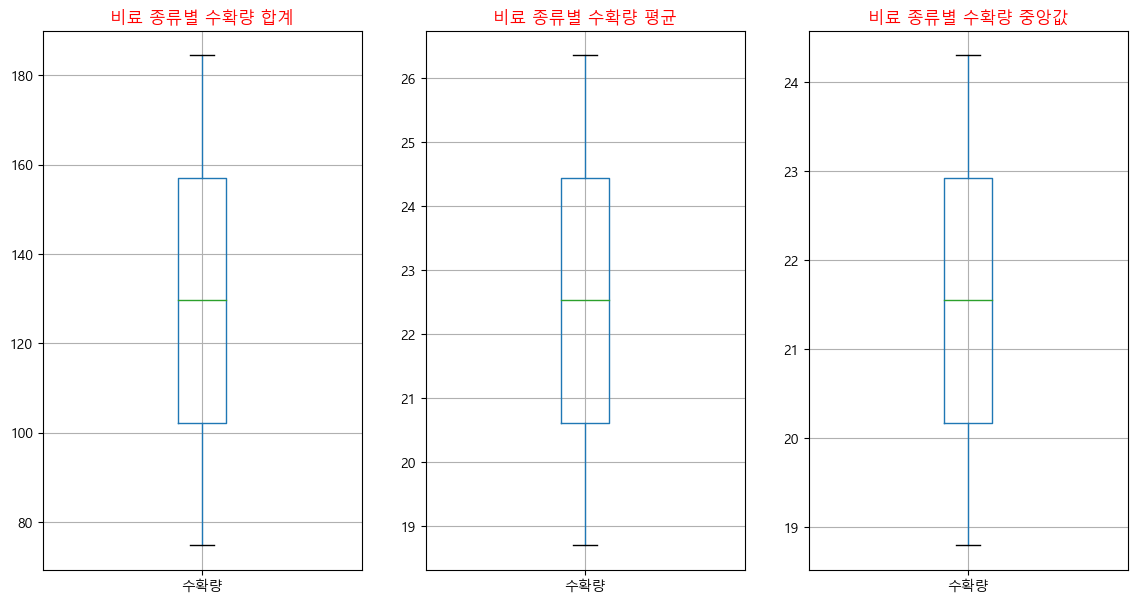

In [145]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,7))

#------<ax1>------#
df2.boxplot(['수확량'], ax=ax1)
ax1.title.set_text("비료 종류별 수확량 합계")
ax1.title.set_fontsize(12)
ax1.title.set_color("#ff0000")
#------<ax2>------#
df3.boxplot(['수확량'], ax=ax2)   #가치의 중앙값을 2개로 나눠서 출력하고 싶음
ax2.title.set_text("비료 종류별 수확량 평균")
ax2.title.set_fontsize(12)
ax2.title.set_color("#ff0000")
#------<ax3>------#
df4.boxplot(['수확량'], ax=ax3)
ax3.title.set_text("비료 종류별 수확량 중앙값")
ax3.title.set_fontsize(12)
ax3.title.set_color("#ff0000")
plt.show()
plt.close()

결론 : 수확량의 합계, 평균, 중앙값 모두 A 비료를 사용했을 때 높았기 때문에 지질상 차이가 없다면 A 비료를 사용할 수록 수확량이 지속적으로 높을 것이라고 예상됨

## 문제4

두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라.

최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시

In [146]:
df=read_excel("https://data.hossam.kr/D02/analysis_grade.xlsx")
df

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [147]:
# 확과별 점수 총함
df1=df.groupby("학과").sum()
df1

,점수
학과,
A,875
C,674


In [148]:
# 학과별 점수 평균
df2=df.groupby("학과").mean()
df2

,점수
학과,
A,43.750000
C,56.166667


In [149]:
# 학과별 점수 중앙값
df3=df.groupby("학과").median()
df3

,점수
학과,
A,42.5
C,52.5


In [150]:
# 학과별 점수 표준편차
df4=df.groupby('학과').std()
df4

,점수
학과,
A,20.229928
C,14.689720


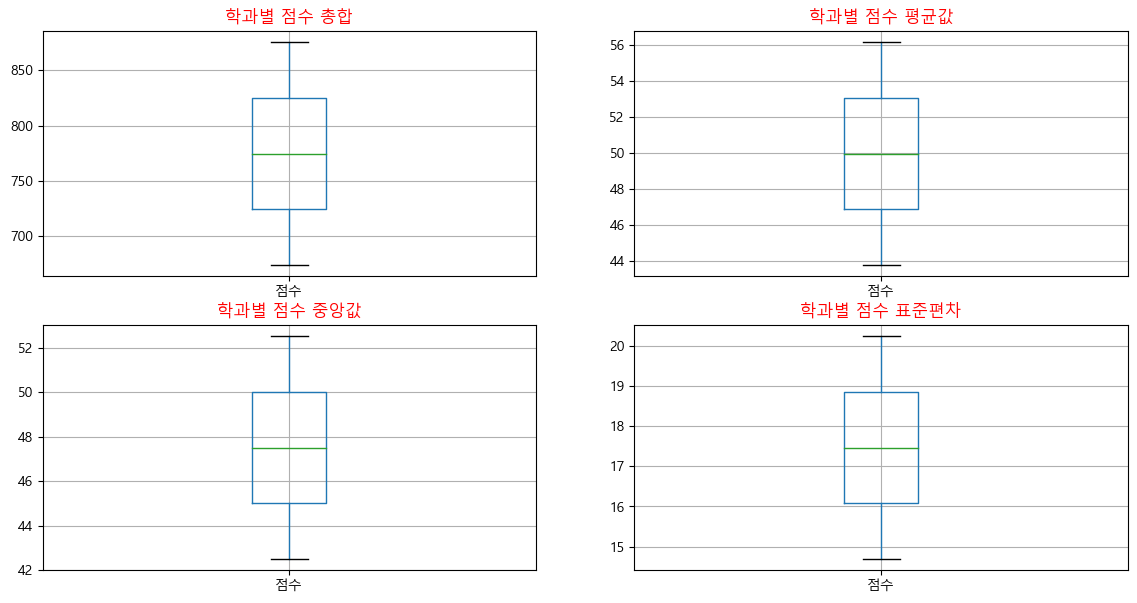

In [151]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,7))

#------<ax1>------#
df1.boxplot(['점수'], ax=ax1)
ax1.title.set_text("학과별 점수 총합")
ax1.title.set_fontsize(12)
ax1.title.set_color("#ff0000")
#------<ax2>------#
df2.boxplot(['점수'], ax=ax2)   #가치의 중앙값을 2개로 나눠서 출력하고 싶음
ax2.title.set_text("학과별 점수 평균값")
ax2.title.set_fontsize(12)
ax2.title.set_color("#ff0000")
#------<ax3>------#
df3.boxplot(['점수'], ax=ax3)
ax3.title.set_text("학과별 점수 중앙값")
ax3.title.set_fontsize(12)
ax3.title.set_color("#ff0000")
#------<ax3>------#
df4.boxplot(['점수'], ax=ax4)
ax4.title.set_text("학과별 점수 표준편차")
ax4.title.set_fontsize(12)
ax4.title.set_color("#ff0000")

plt.show()
plt.close()